In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 수질 분석할 컬럼 정하기
1) 변화가 적은 컬럼보다 max-min이 큰 컬럼으로 선정하여 그래프 그리기 <br>
2) max-min 값이 비슷한 것끼리 같이 그리기
* 과망간산칼륨소비량: 수중에 존재하는 유기물 등에 의해 소비된 과망간산칼륨의 양을 의미

In [9]:
water = pd.read_excel('../data/preprocessed/water.xlsx', index_col=0)
water.head()

,연도,지역,일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),...,클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",포름알데히드(기준:0.5/ 단위:(mg/L))
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.007183,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.016176,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.014198,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.014614,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.011760,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0


In [19]:
df = water.iloc[:, 2:]
sr = df.max() - df.min()
sr.sort_values(ascending=False, inplace=True)

In [28]:
sr

증발잔류물(기준:500/ 단위:(mg/L))                  230.867264
경도(기준:300/ 단위:(mg/L))                      87.041557
황산이온(기준:200/ 단위:(mg/L))                    67.977848
염소이온(기준:250/ 단위:(mg/L))                    40.040137
일반세균(기준:100/ 단위:(CFU/mL))                   6.666667
수소이온농도(기준:5.8 ~ 8.5/ 단위:-)                  4.615290
과망간산칼륨소비량(기준:10/ 단위:(mg/L))                 3.050226
질산성질소(기준:10/ 단위:(mg/L))                     1.993741
색도(기준:5/ 단위:(도))                            1.177172
잔류염소(기준:4/ 단위:(mg/L))                       0.872749
불소(기준:1.5/ 단위:(mg/L))                       0.440217
붕소(기준:1/ 단위:(mg/L))                         0.090278
알루미늄(기준:0.2/ 단위:(mg/L))                     0.061972
아연(기준:3/ 단위:(mg/L))                         0.050000
톨루엔(기준:0.7/ 단위:(mg/L))                      0.044579
총트리할로메탄(기준:0.1/ 단위:(mg/L))                  0.041806
할로아세틱에시드(기준:0.1/ 단위:(mg/L))                 0.040115
포름알데히드(기준:0.5/ 단위:(mg/L))                   0.032792
클로로포름(기준:0.08/ 단위:(mg/L))                   0.

In [27]:
# 사용할 컬럼 list로 만들기
[sr.index[7]] + list(sr.index[9:19])

['질산성질소(기준:10/ 단위:(mg/L))',
 '잔류염소(기준:4/ 단위:(mg/L))',
 '불소(기준:1.5/ 단위:(mg/L))',
 '붕소(기준:1/ 단위:(mg/L))',
 '알루미늄(기준:0.2/ 단위:(mg/L))',
 '아연(기준:3/ 단위:(mg/L))',
 '톨루엔(기준:0.7/ 단위:(mg/L))',
 '총트리할로메탄(기준:0.1/ 단위:(mg/L))',
 '할로아세틱에시드(기준:0.1/ 단위:(mg/L))',
 '포름알데히드(기준:0.5/ 단위:(mg/L))',
 '클로로포름(기준:0.08/ 단위:(mg/L))']

# Correlation

In [32]:
from scipy import stats   # Correlation efficient 뿐만 아니라 p-value도 확인 가능

In [108]:
wh = pd.read_excel('../data/preprocessed/water_health.xlsx', index_col=0)
cor = wh.iloc[:, 2:].corr()
cor

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
일반세균(기준:100),1.000000,0.731231,0.058786,0.003519,-0.005916,NaN,-0.008812,0.007398,0.129937,0.008164,...,-0.092838,-0.022147,-0.035964,-0.013906,-0.196372,0.026594,-0.004459,0.013860,0.011585,0.137413
납(기준:0.01),0.731231,1.000000,0.101865,-0.026561,-0.031009,NaN,-0.010461,0.032875,0.025721,0.022266,...,-0.099403,0.036050,-0.048058,0.005258,-0.231496,-0.042324,0.037689,0.080771,0.007554,0.122314
불소(기준:1.5),0.058786,0.101865,1.000000,0.010381,-0.046251,NaN,0.021502,-0.043009,0.043966,0.057376,...,0.210089,0.405762,0.232935,0.058673,0.073334,-0.156233,-0.247057,-0.250123,0.236236,0.085950
비소(기준:0.01),0.003519,-0.026561,0.010381,1.000000,0.042030,NaN,0.216100,0.408681,0.165657,0.019118,...,-0.078555,-0.064971,-0.031353,-0.041089,-0.062494,0.117550,-0.060067,0.059372,0.035712,-0.001463
셀레늄(기준:0.01),-0.005916,-0.031009,-0.046251,0.042030,1.000000,NaN,-0.015903,0.123011,0.150189,-0.032049,...,-0.119356,-0.069763,-0.092357,-0.026135,0.029841,0.077613,-0.060631,0.110406,0.144806,-0.053469
수은(기준:0.001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시안(기준:0.01),-0.008812,-0.010461,0.021502,0.216100,-0.015903,NaN,1.000000,-0.001444,-0.019669,0.001303,...,0.023766,-0.015431,-0.032622,-0.012806,0.075371,-0.008348,0.095685,0.114297,0.057941,-0.045293
크롬(기준:0.05),0.007398,0.032875,-0.043009,0.408681,0.123011,NaN,-0.001444,1.000000,0.132650,-0.101692,...,-0.170486,-0.107344,-0.065340,-0.009560,-0.005364,0.133530,-0.159292,0.097419,0.096521,-0.090911
암모니아성질소(기준:0.5),0.129937,0.025721,0.043966,0.165657,0.150189,NaN,-0.019669,0.132650,1.000000,-0.239984,...,-0.137217,-0.073500,-0.027542,-0.040883,-0.053088,0.264349,-0.237513,-0.227852,0.081973,0.259913
질산성질소(기준:10),0.008164,0.022266,0.057376,0.019118,-0.032049,NaN,0.001303,-0.101692,-0.239984,1.000000,...,-0.149970,-0.137704,0.160815,-0.016794,-0.271448,-0.157688,0.293494,0.178900,0.115837,0.002298


In [110]:
# 각 건강관련요인 컬럼에서 가장 큰 상관관계지수
for i in range(-6, 0):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    max_idx = sr.idxmax()
    max_cor = sr[0]
    print(max_idx, max_cor)

질산성질소(기준:10) 0.27144793287297897
증발잔류물(기준:500) 0.3481050266482788
디브로모클로로메탄(기준:0.1) 0.4300682710271766
알루미늄(기준:0.2) 0.44288464260129373
불소(기준:1.5) 0.23623630972795404
동(기준:1) 0.30896275886471775


In [111]:
# 스트레스 인지율, 우울감 경험률
for i in range(-4, -2):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    display(cor.columns[i], sr)

'스트레스인지율'

디브로모클로로메탄(기준:0.1)              0.430068
알루미늄(기준:0.2)                   0.347615
디브로모아세토니트릴(기준:0.1)             0.326778
브로모디클로로메탄(기준:0.03)             0.314072
질산성질소(기준:10)                   0.293494
총트리할로메탄(기준:0.1)                0.286188
황산이온(기준:200)                   0.279639
망간(기준:0.05)                    0.272785
불소(기준:1.5)                     0.247057
암모니아성질소(기준:0.5)                0.237513
증발잔류물(기준:500)                  0.232905
붕소(기준:1)                       0.232230
색도(기준:5)                       0.221664
수소이온농도(기준:5.8 ~ 8.5)           0.189110
다이아지논(기준:0.02)                 0.188199
염소이온(기준:250)                   0.180770
톨루엔(기준:0.7)                    0.179668
트리클로로에틸렌(기준:0.03)              0.178503
크롬(기준:0.05)                    0.159292
동(기준:1)                        0.158863
1,1,1-트리클로로에탄(기준:0.1)          0.151675
과망간산칼륨소비량(기준:10)               0.149601
디클로로메탄(기준:0.02)                0.126034
1,4-다이옥산(기준:0.05)              0.125717
클로로포름(기준:0.08)                 0.116988


'우울감경험률'

알루미늄(기준:0.2)                   0.442885
디브로모클로로메탄(기준:0.1)              0.381836
브로모디클로로메탄(기준:0.03)             0.373367
총트리할로메탄(기준:0.1)                0.251544
불소(기준:1.5)                     0.250123
암모니아성질소(기준:0.5)                0.227852
톨루엔(기준:0.7)                    0.214646
붕소(기준:1)                       0.195890
질산성질소(기준:10)                   0.178900
트리클로로에틸렌(기준:0.03)              0.175355
디브로모아세토니트릴(기준:0.1)             0.156218
1,4-다이옥산(기준:0.05)              0.153376
황산이온(기준:200)                   0.144729
파라티온(기준:0.06)                  0.134413
1,1,1-트리클로로에탄(기준:0.1)          0.134348
과망간산칼륨소비량(기준:10)               0.132755
클로로포름(기준:0.08)                 0.132256
세제(기준:0.5)                     0.126522
시안(기준:0.01)                    0.114297
카바릴(기준:0.07)                   0.113536
셀레늄(기준:0.01)                   0.110406
1,2-디브로모-3-클로로프로판(기준:0.003)    0.106873
페니트로티온(기준:0.04)                0.103043
잔류염소(기준:4)                     0.101877
망간(기준:0.05)                    0.101599


## Correlation Visualisation by Heatmap

In [114]:
# 히트맵 그릴 부분 dataframe
h_map = abs(cor.iloc[-6:, :-6])    # 상관계수 절대값 처리
h_map

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5)
삶의질지수,0.196372,0.231496,0.073334,0.062494,0.029841,NaN,0.075371,0.005364,0.053088,0.271448,...,0.149087,0.077339,0.010184,0.018162,0.057552,0.139242,0.116276,0.147635,0.047429,0.107600
양호한주관적건강수준인지율,0.026594,0.042324,0.156233,0.117550,0.077613,NaN,0.008348,0.133530,0.264349,0.157688,...,0.125749,0.038494,0.025758,0.061283,0.109266,0.125681,0.267194,0.218998,0.220434,0.084801
스트레스인지율,0.004459,0.037689,0.247057,0.060067,0.060631,NaN,0.095685,0.159292,0.237513,0.293494,...,0.116988,0.059236,0.326778,0.046120,0.062953,0.100205,0.314072,0.430068,0.125717,0.092929
우울감경험률,0.013860,0.080771,0.250123,0.059372,0.110406,NaN,0.114297,0.097419,0.227852,0.178900,...,0.132256,0.063676,0.156218,0.002065,0.021919,0.018600,0.373367,0.381836,0.153376,0.061089
주관적구강건강이나쁜인구의분율,0.011585,0.007554,0.236236,0.035712,0.144806,NaN,0.057941,0.096521,0.081973,0.115837,...,0.124643,0.056629,0.076785,0.101854,0.071816,0.179027,0.203190,0.051305,0.019607,0.023648
연간보건기관이용률,0.137413,0.122314,0.085950,0.001463,0.053469,NaN,0.045293,0.090911,0.259913,0.002298,...,0.099704,0.047460,0.237454,0.127357,0.179079,0.145381,0.256526,0.238984,0.085586,0.130599


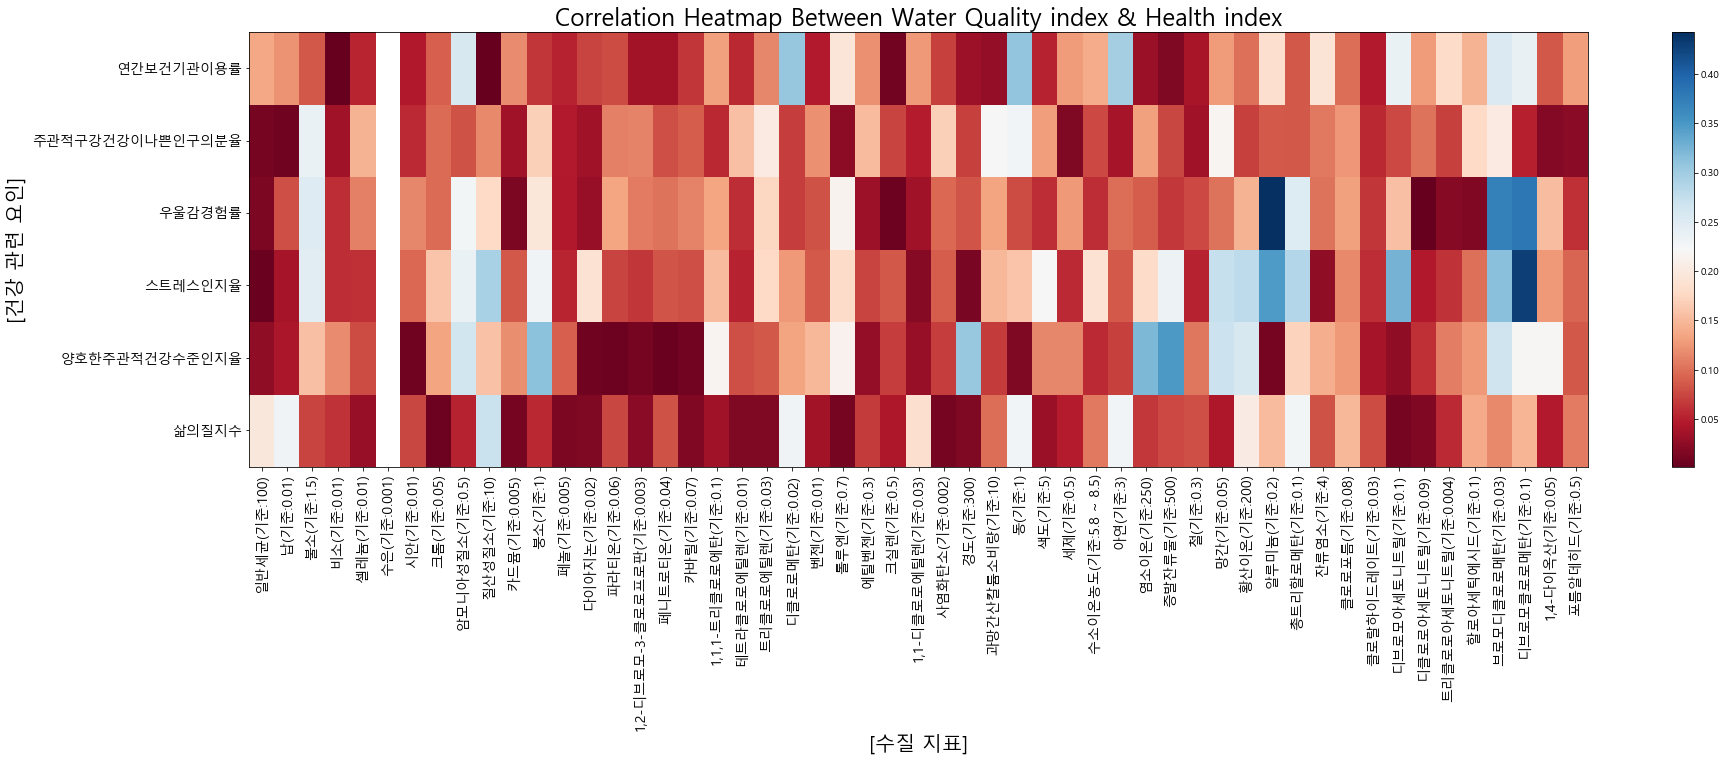

In [115]:
plt.figure(figsize=(30, 8))
plt.rc('font', family='Malgun Gothic')  

plt.pcolor(h_map, cmap='RdBu')  

plt.xticks(np.arange(h_map.shape[1]) + 0.5, labels=h_map.columns, rotation=90, fontsize=14)    # 길어서 겹치므로 회전시킴
plt.yticks(np.arange(h_map.shape[0]) + 0.5, labels=h_map.index, fontsize=14)

plt.title('Correlation Heatmap Between Water Quality index & Health index', fontsize=24)
plt.xlabel('[수질 지표]', fontsize=20)
plt.ylabel('[건강 관련 요인]', fontsize=20) 

plt.colorbar()
plt.show()

> 절대값 처리하지 않은 상관계수는 가장 큰 값(-0.5, 0.5)이 Red, Blue로 나뉘어서 가독성이 떨어짐

## Linear Regression

In [116]:
wh.head()

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),...,브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.963,46.4,30.1,7.2,37.7,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.962,49.8,27.3,8.8,35.1,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.951,48.4,26.8,8.7,35.4,0.0


### Combination 1

In [118]:
x = wh[['질산성질소(기준:10)', '망간(기준:0.05)', '황산이온(기준:200)', '알루미늄(기준:0.2)', '총트리할로메탄(기준:0.1)', 
        '디브로모아세토니트릴(기준:0.1)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y = wh['스트레스인지율']

In [119]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [121]:
# Train & Test data
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=5)
x_train.shape, y_test.shape

((137, 8), (60,))

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
lr.score(x_test, y_test)

0.3128501028947053

### Combimation 2

In [131]:
x2 = wh[['알루미늄(기준:0.2)', '디브로모아세토니트릴(기준:0.1)', '디브로모클로로메탄(기준:0.1)']]
y2 = wh['스트레스인지율']

scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2_scaled, y2, test_size=0.3, random_state=5)
x2_train.shape, y2_test.shape

lr = LinearRegression()
lr.fit(x2_train, y2_train)

lr.score(x2_test, y2_test)

0.2530045566168384

### Combination 3

In [137]:
x3 = wh[['알루미늄(기준:0.2)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y3 = wh['우울감경험률']

scaler = StandardScaler()
x3_scaled = scaler.fit_transform(x3)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3_scaled, y3, test_size=0.3, random_state=5)
x3_train.shape, y3_test.shape

lr = LinearRegression()
lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test)

0.2484828674524444

> 생각보다 크게 상관관계 없음